In [1]:
import sys
import glob
import pickle
import hashlib
import PIL
from os.path import splitext, basename, join, isfile
from collections import defaultdict, Counter
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np

from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.measure import ransac
from skimage.transform import AffineTransform

from delf import feature_io

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def pickle_load(path):
    """function to load pickle object"""
    with open(path, 'rb') as f:
        return pickle.load(f, encoding='latin1')

def _pickle_dump(file, path):
    """function to dump picke object"""
    with open(path, 'wb') as f:
        pickle.dump(file, f, -1)

def _get_new_name(path):
    """rename file if file already exist"""
    i = 0
    new_path = path
    while isfile(new_path):
        ext = splitext(path)[1]
        new_path = path.replace(ext, '_{}{}'.format(i, ext))
        i += 1
    return new_path
    
def pickle_dump(file, path, force=False):
    """dump a file without deleting an existing one"""
    if force:
        _pickle_dump(file, path)
    elif not force:
        new_path = _get_new_name(path)
        _pickle_dump(file, new_path)

In [31]:
query_images = glob.glob('/media/hdd1/kaggle/landmark-retrieval-challenge/test/*')
index_images = glob.glob('/media/hdd1/kaggle/landmark-retrieval-challenge/index/*')
# compress
query_images = [splitext(basename(path))[0] for path in query_images]
index_images = [splitext(basename(path))[0] for path in index_images]

# query_delf_files = glob.glob('/media/hdd1/kaggle/landmark-retrieval-challenge/feature_test_256x256/*'
# index_delf_files = glob.glob('/media/hdd1/kaggle/landmark-retrieval-challenge/feature_index_256x256/*')

In [ ]:
# big ben
# 4f4b811a065c1423 => index in filenames_index : 399363
# 4e899444d83ca6b2 => index in filenames_index : 127007
# 1b0a2ccecabea7cc => index 
# 2fd1ca3544e95148

# Montagne
# query : 30795c2388b1d0b4 : 25672
# index : 693326a5738aefcd : 385509
# index : b580027e974cb582

# bed
# query 2d5bf074b55a1cd2

# golden gate
# query 457f865be2097c80

# random
# 4205e0e6ea3b1850 70930e1ce60744e4

In [71]:
def random_image(folder='index'):
    path = '/media/hdd1/kaggle/landmark-retrieval-challenge/{}/{}.jpg'
    if folder == 'index':
        filename = np.random.choice(index_images)
    elif folder == 'test':
        filename = np.random.choice(query_images)        
    print(filename)
    plt.imshow(mpimg.imread(path.format(folder, filename)))
    plt.show()
    
def plot_image(filename, folder='test'):
    path = '/media/hdd1/kaggle/landmark-retrieval-challenge/{}/{}.jpg'
    plt.imshow(mpimg.imread(path.format(folder, filename)))
    plt.show()

efa8f5ec4954ea45


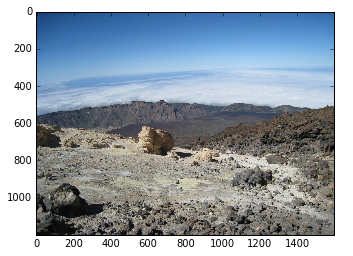

In [240]:
random_image(folder='index')

In [248]:
a = np.random.randint(0, 10, size=(10, 2))

In [257]:
index = [0, 0, 0, 1, 1, 2]

In [258]:
A

array([[3, 6],
       [3, 6],
       [3, 6],
       [4, 1],
       [4, 1],
       [5, 9]])

In [266]:
loc_index_to_use = np.array([])
loc_query_to_use = np.array([])

In [270]:
loc_index_to_use = np.array([
    [180.99548, 180.99548],
    [180.99548, 180.99548],
    [224.     , 224.     ],
    [192.     , 192.     ],
    [180.99548, 180.99548],
    [128.     , 224.     ],
    [180.99548, 180.99548],
    [192.     , 192.     ],
    [180.99548, 180.99548],
    [180.99548, 180.99548],
    [180.99548, 180.99548],
    [224.     , 224.     ]
])


loc_query_to_use = np.array([
    [ 0.  , 0.],
    [45.25, 45.25],
    [45.25, 45.25],
    [64.  , 0.],
    [64.  , 0.],
    [ 0.  , 22.6],
    [ 0.  , 0.],
    [ 0.  , 0.],
    [ 0.  , 0.],
    [32.  , 64],
    [32.  , 32],
    [32.  , 32],
])

In [322]:
_, inliers = ransac(
  (loc_index_to_use, loc_query_to_use),
  AffineTransform,
  min_samples=3,
  residual_threshold=20,
  max_trials=10)

/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:314: RuntimeWarning: divide by zero encountered in true_divide
  H.flat[list(self._coeffs) + [8]] = - V[-1, :-1] / V[-1, -1]
/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:314: RuntimeWarning: invalid value encountered in true_divide
  H.flat[list(self._coeffs) + [8]] = - V[-1, :-1] / V[-1, -1]
/usr/local/lib/python3.5/dist-packages/skimage/measure/fit.py:898: RuntimeWarning: invalid value encountered in less
  sample_model_inliers = sample_model_residuals < residual_threshold


In [272]:
inliers

array([ True, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True])